In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr 
%matplotlib inline

import math

train = pd.read_csv("data/training_set_VU_DM_2014.csv")
#test = pd.read_csv("data/test_set_VU_DM_2014.csv")
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


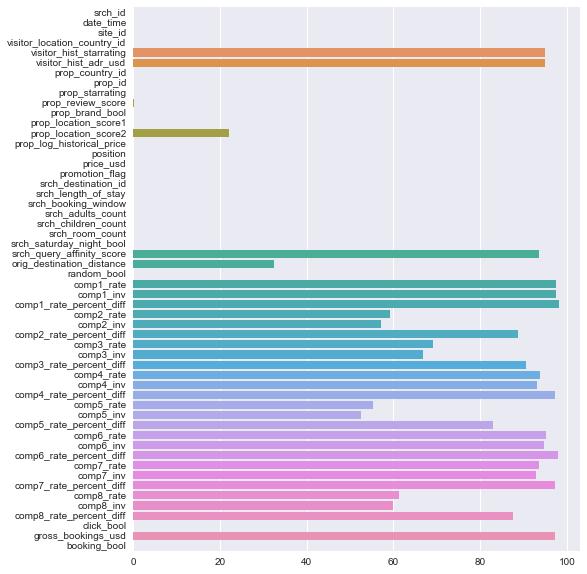

In [42]:
# Missing values
m = train.isnull().sum() / len(train) * 100
plt.figure(figsize=(8, 10))
sns.barplot(x=m.values, y=m.keys())

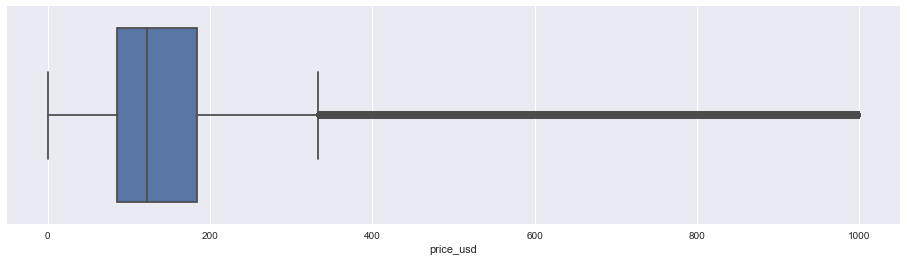

In [43]:
# Price distribution
plt.figure(figsize=(16, 4))
sns.boxplot(x=train.loc[train.price_usd < 1000].price_usd)

In [44]:
train.price_usd.max()

19726328.0

In [45]:
(train.price_usd > 1000).mean()

0.0026851690694499599

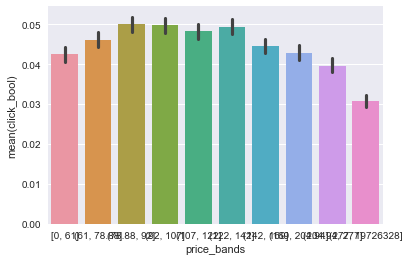

In [46]:
train["price_bands"] = pd.qcut(train.price_usd, 10)
#g = train.groupby("price_bands")
sns.barplot(x="price_bands", y="click_bool", data=train.sample(frac=0.1))

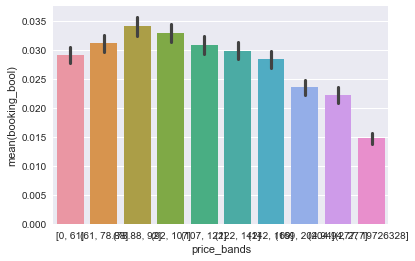

In [47]:
sns.barplot(x="price_bands", y="booking_bool", data=train.sample(frac=0.1))

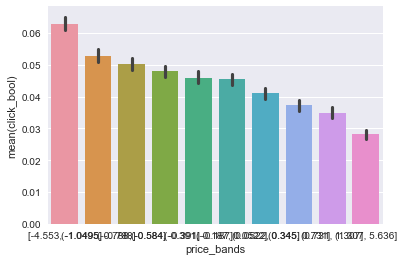

In [48]:
# Normalize prices by srch_id
train["price_norm"] = train.groupby("srch_id")["price_usd"].transform(lambda x: (x - x.mean()) / x.std())
train["price_norm_bands"] = pd.qcut(tr.price_norm, 10)
sns.barplot(x="price_bands", y="click_bool", data=tr.sample(frac=0.1))

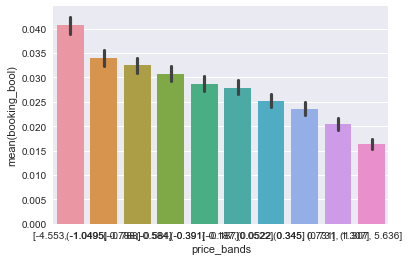

In [49]:
sns.barplot(x="price_bands", y="booking_bool", data=tr.sample(frac=0.1))

152.24


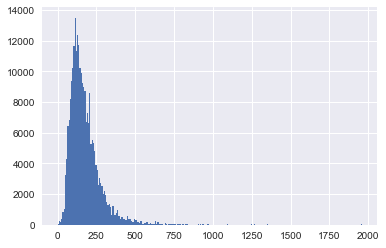

In [57]:
train.visitor_hist_adr_usd.hist(bins=250)
print(train.visitor_hist_adr_usd.median())

In [56]:
train.visitor_hist_adr_usd.median()

152.24

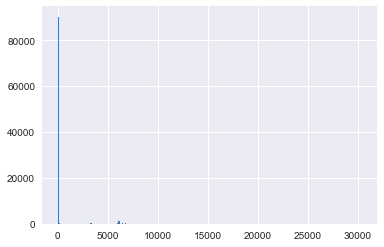

In [64]:
train.comp1_rate_percent_diff.hist(bins=250)

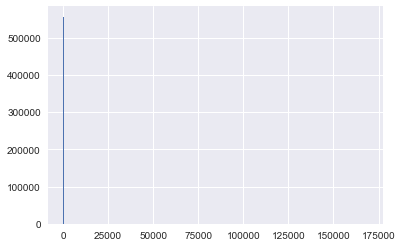

In [63]:
train.comp2_rate_percent_diff.hist(bins=250)

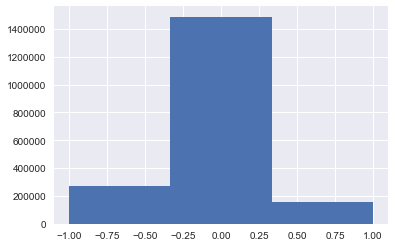

In [74]:
train.comp8_rate.hist(bins=3)

In [75]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'